## Prevendo Diabetes com Regressão Logística

In [ ]:
# Importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

### Carregar e visualizar os dados

,NumGravidez,Glicose,Pressao,EspessuraPele,Insulina,IMC,DiabetesPedigree,Idade,Resultado
0,1,85,66,29,0,26.6,0.351,31,0
1,8,183,64,0,0,23.3,0.672,32,1
2,1,89,66,23,94,28.1,0.167,21,0
3,0,137,40,35,168,43.1,2.288,33,1
4,5,116,74,0,0,25.6,0.201,30,0


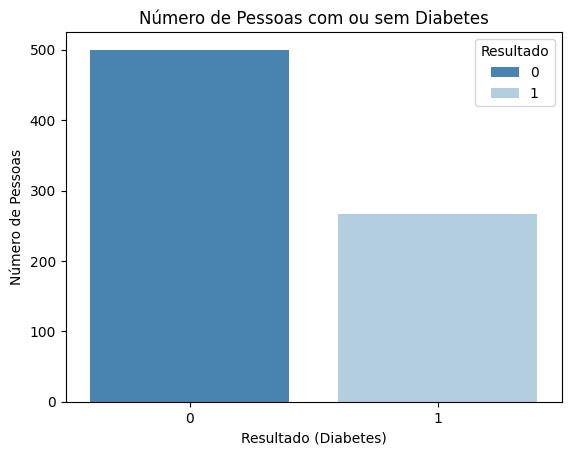

In [124]:
def extrair(dataset):
    return pd.read_csv(dataset)

# Transformando o dataset em dataframe
df = extrair('https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv')

# Adicionar nome as colunas
df.columns = ["NumGravidez", "Glicose", "Pressao", "EspessuraPele", "Insulina", "IMC", "DiabetesPedigree", "Idade", "Resultado"]

# Ver as 5 primeiras linhas
display(df.head())

# Ver se existe mais pessoas com diabete ou sem
resultado_groupby = df.groupby('Resultado').size()

# Exibir o gráfico de barras
sns.barplot(x=resultado_groupby.index, y=resultado_groupby.values, palette="Blues_r", hue=resultado_groupby.index)
plt.xlabel('Resultado (Diabetes)')
plt.ylabel('Número de Pessoas')
plt.title('Número de Pessoas com ou sem Diabetes')
plt.show()

### Dividir em treino e teste

In [94]:
x = df.drop('Resultado', axis=1)
y = df['Resultado']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

modelo_logistic = LogisticRegression()
modelo_logistic.fit(x_train, y_train)

y_pred = modelo_logistic.predict(x_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia: {accuracy * 100:.2f}%')

Acurácia: 81.17%


### Correlação das colunas com a Diabete

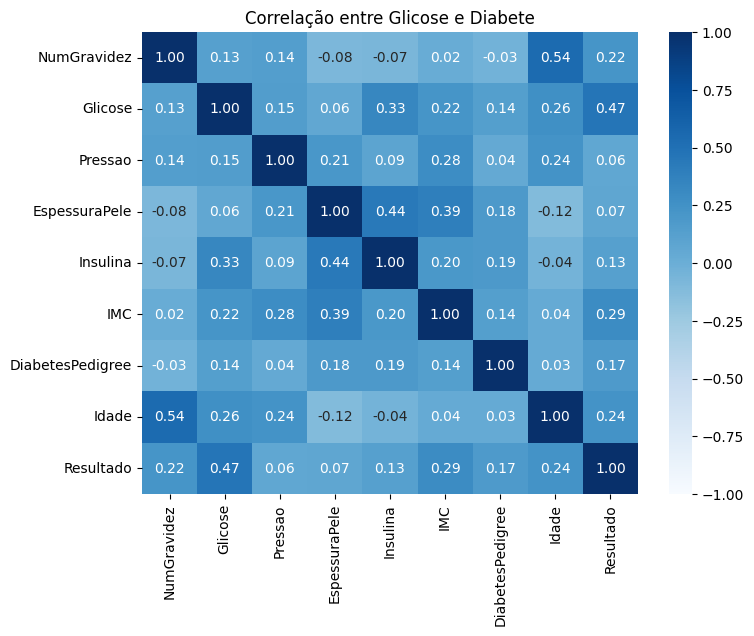

In [122]:
correlação = df.corr()

# Gráfico para mostrar a correlação, quanto maior for, mais correlação tem.
plt.figure(figsize=(8, 6))
sns.heatmap(correlação, annot=True, fmt=".2f", cmap='Blues', vmin=-1, vmax=1)
plt.title("Correlação entre Glicose e Diabete")
plt.show()

### Usando o modelo

In [ ]:
# NumGravidez | Glicode | Pressão | EspessuraPele | Insulina | IMC | DiabetesPedigree | Idade
 
novos_dados = [[0, 102, 70, 45, 25, 18.70, 0, 62]]

# Normalizar dados
dados_normalizados = scaler.fit_transform(novos_dados)

# Fazer previsão
resultado = modelo_logistic.predict(dados_normalizados)

# Exibir o resultado
print(f'O paciente tem diabete? {"Sim" if resultado == 1 else "Não"}')

O paciente tem diabete? Não
